In [6]:
import pandas as pd 
import numpy as np

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [8]:
%matplotlib inline

In [9]:
df=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\df_copy.csv')

In [10]:
del(df['Unnamed: 0'])

In [11]:
df.sample(3)

,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,release_year,release_month,release_quarter
2990,"['Leonor Varela', 'Jacob Vargas', 'Luis Fernan...",['Alex Rivera'],2500000,"['Drama', 'Science Fiction', 'Thriller']","['virtual reality', 'dystopia', 'moral conflic...",en,Sleep Dealer,4.624691,['Likely Story'],"['Mexico', 'United States of America']",107559,90.0,Released,6.0,40,2008,12,4
207,"['Jeremy Renner', 'Rachel Weisz', 'Edward Nort...",['Tony Gilroy'],130000000,"['Action', 'Thriller']","['assassin', 'wolf', 'maryland', 'suicide by g...",en,The Bourne Legacy,90.336810,"['Universal Pictures', 'Dentsu', 'Relativity M...",['United States of America'],276572938,120.0,Released,6.0,2651,2012,8,3
2023,"['Johnny Depp', 'Martin Landau', 'Sarah Jessic...",['Tim Burton'],18000000,"['Comedy', 'Drama', 'History']","['individual', 'taxi', 'transsexuality', 'fort...",en,Ed Wood,24.548633,['Touchstone Pictures'],['United States of America'],5887457,127.0,Released,7.3,630,1994,9,3


In [12]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'ko', 'te', 'ru', 'de', 'cn', 'es', 'it',
       'nl', 'th', 'da', 'xx', 'hi', 'is', 'nb', 'pt', 'af', 'pl', 'he',
       'vi', 'id', 'ro', 'no', 'fa'], dtype=object)

In [13]:
df_clust=df[['budget','original_language','popularity','revenue','runtime','status','vote_average','vote_count','release_year','release_quarter']]

In [14]:
df_clust.sample(2)

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,release_year,release_quarter
3184,325000,en,11.871424,4500000,105.0,Released,7.7,275,1934,1
138,150000000,en,39.004588,205366737,131.0,Released,6.4,1891,2013,2


In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['original_language','status']),remainder='passthrough')

In [17]:
clust_trans=column_trans.fit_transform(df_clust)

In [18]:
clust_trans=pd.DataFrame(clust_trans)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
clust_trans_scaled=scaler.fit_transform(clust_trans)

## Hierarchial clustering (before pca)

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage 

In [22]:
hier_clust = linkage(clust_trans_scaled, method='ward')

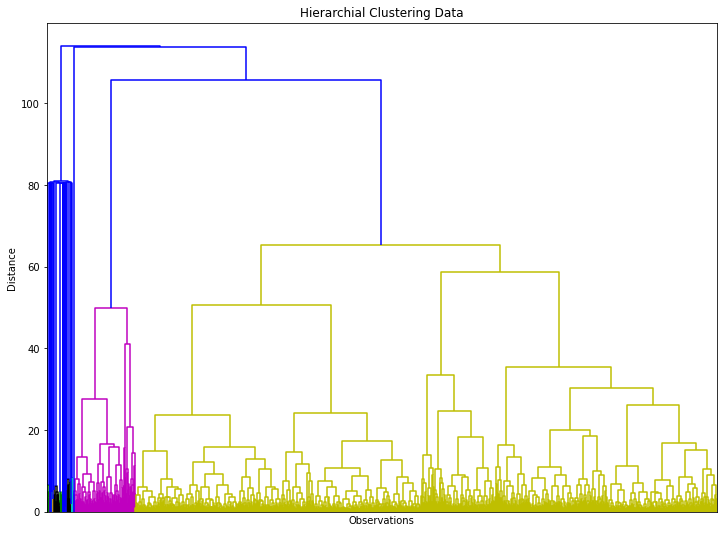

In [23]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial Clustering Data')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level')
plt.show()